In [4]:
# Dependencies
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
from locale import atof

In [9]:
jan_2018_df = pd.read_csv("../Resources/Jan_2018.csv")
jan_2017_df = pd.read_csv("../Resources/Jan_2017.csv")
jan_2016_df = pd.read_csv("../Resources/Jan_2016.csv")
apr_2018_df = pd.read_csv("../Resources/Apr_2018.csv")
apr_2017_df = pd.read_csv("../Resources/Apr_2017.csv")
apr_2016_df = pd.read_csv("../Resources/Apr_2016.csv")
jul_2017_df = pd.read_csv("../Resources/July_2017.csv")
jul_2016_df = pd.read_csv("../Resources/July_2016.csv")
jul_2015_df = pd.read_csv("../Resources/July_2015.csv")
oct_2017_df = pd.read_csv("../Resources/Oct_2017.csv")
oct_2016_df = pd.read_csv("../Resources/Oct_2016.csv")
oct_2015_df = pd.read_csv("../Resources/Oct_2015.csv")

master_stats_df = jan_2018_df
master_stats_df = master_stats_df.append(jan_2017_df)
master_stats_df = master_stats_df.append(jan_2016_df)
master_stats_df = master_stats_df.append(apr_2018_df)
master_stats_df = master_stats_df.append(apr_2017_df)
master_stats_df = master_stats_df.append(apr_2016_df)
master_stats_df = master_stats_df.append(jul_2017_df)
master_stats_df = master_stats_df.append(jul_2016_df)
master_stats_df = master_stats_df.append(jul_2015_df)
master_stats_df = master_stats_df.append(oct_2017_df)
master_stats_df = master_stats_df.append(oct_2016_df)
master_stats_df = master_stats_df.append(oct_2015_df)

#master_stats_df = pd.read_csv("../Resources/Jan_2018.csv")
master_stats_df.fillna(value=0 , inplace=True)

unique_carrier_list = master_stats_df["UniqueCarrier"].unique()

Delay_df = master_stats_df[master_stats_df.DepDelayMinutes > 0]
beforetime_df = master_stats_df[master_stats_df.ArrDelay < 0]
cancelled_flights_df = master_stats_df[master_stats_df.Cancelled > 0]
diverted_flights_df = master_stats_df[master_stats_df.Diverted > 0]

master_stats_df.head()

C:\Users\saife\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\saife\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\saife\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\saife\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, re

,ActualElapsedTime,AirTime,AirlineID,ArrDel15,ArrDelay,ArrDelayMinutes,ArrTime,ArrTimeBlk,ArrivalDelayGroups,CRSArrTime,...,TailNum,TaxiIn,TaxiOut,TotalAddGTime,UniqueCarrier,Unnamed: 109,WeatherDelay,WheelsOff,WheelsOn,Year
0,355.0,324.0,0.0,0.0,-24.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
1,350.0,327.0,0.0,0.0,-36.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
2,364.0,344.0,0.0,0.0,-17.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
3,345.0,325.0,0.0,0.0,-34.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
4,356.0,334.0,0.0,0.0,-32.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018


In [10]:
master_stats_df.count()

ActualElapsedTime       5962813
AirTime                 5962813
AirlineID               5962813
ArrDel15                5962813
ArrDelay                5962813
ArrDelayMinutes         5962813
ArrTime                 5962813
ArrTimeBlk              5962813
ArrivalDelayGroups      5962813
CRSArrTime              5962813
CRSDepTime              5962813
CRSElapsedTime          5962813
CancellationCode        5962813
Cancelled               5962813
Carrier                 5962813
CarrierDelay            5962813
DayOfWeek               5962813
DayofMonth              5962813
DepDel15                5962813
DepDelay                5962813
DepDelayMinutes         5962813
DepTime                 5962813
DepTimeBlk              5962813
DepartureDelayGroups    5962813
Dest                    5962813
DestAirportID           5962813
DestAirportSeqID        5962813
DestCityMarketID        5962813
DestCityName            5962813
DestState               5962813
                         ...   
Diverted

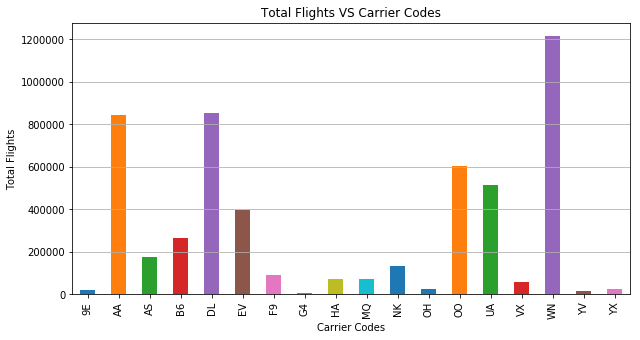

In [79]:
carrier_group_df = master_stats_df.groupby("UniqueCarrier")

carrier_total_flights_df = carrier_group_df["Flights"].sum()
count_chart = carrier_total_flights_df.plot(kind='bar', figsize= (10,5))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Carrier Codes")
count_chart.set_ylabel("Total Flights")

plt.title("Total Flights VS Carrier Codes")
plt.grid(axis='y')
plt.show()
plt.tight_layout()


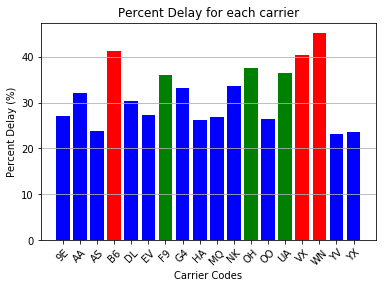

In [57]:
carrier_group_df = master_stats_df.groupby("UniqueCarrier")

carrier_delay_group_df = Delay_df.groupby("UniqueCarrier")


carrier_delay_per  = []

carrier_delay_per = [carrier_delay_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

colors = ['r' if value >= 40 else 'g' if value >= 35 else 'b'  for value in carrier_delay_per]
plt.bar(unique_carrier_list,carrier_delay_per, color = colors)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent Delay (%)")
plt.xticks(rotation = 45)

plt.title("Percent Delay for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()
plt.show()

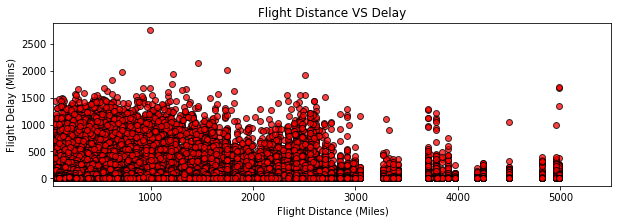

In [62]:
plt.figure(figsize=(10,3))
plt.scatter(master_stats_df["Distance"], master_stats_df["DepDelayMinutes"],marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.title("Flight Distance VS Delay")
plt.xlabel("Flight Distance (Miles)")
plt.ylabel("Flight Delay (Mins)")
plt.xlim(50,5500)
plt.show()

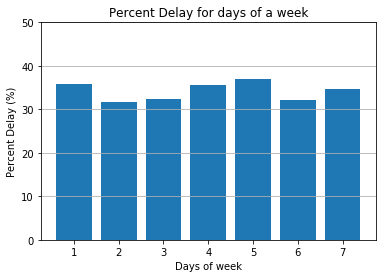

In [32]:
weekdays_delay_df = Delay_df.groupby("DayOfWeek")
weekdays_total_df = master_stats_df.groupby("DayOfWeek")

weekday_delay_per  = []
weekday_list = master_stats_df["DayOfWeek"].unique()

weekday_delay_per = [weekdays_delay_df.get_group(day).size/weekdays_total_df.get_group(day).size* 100 for day in weekday_list]

plt.bar(weekday_list,weekday_delay_per)
plt.xlabel("Days of week")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay for days of a week")
plt.grid(axis='y')
plt.ylim(0,50)
plt.show()
plt.tight_layout()
plt.show()

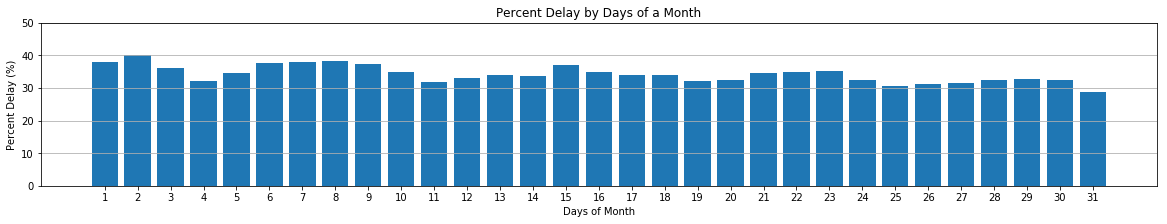

In [69]:
daily_delay_df = Delay_df.groupby("DayofMonth")
daily_total_df = master_stats_df.groupby("DayofMonth")

daily_delay_per  = []
daily_list = master_stats_df["DayofMonth"].unique()

daily_delay_per = [daily_delay_df.get_group(day).size/daily_total_df.get_group(day).size* 100 for day in daily_list]

plt.figure(figsize=(20,3))
plt.bar(daily_list,daily_delay_per)
plt.xlabel("Days of Month")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by Days of a Month")
plt.grid(axis='y')
plt.ylim(0,50)
plt.xticks(daily_list)
plt.show()
plt.tight_layout()
plt.figure(figsize=(20,30))


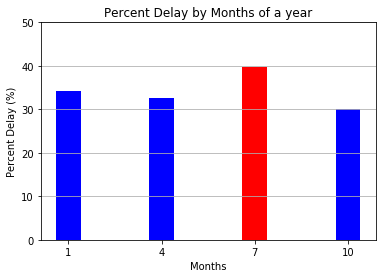

In [72]:
monthly_delay_df = Delay_df.groupby("Month")
monthly_total_df = master_stats_df.groupby("Month")

monthly_delay_per  = []
monthly_list = master_stats_df["Month"].unique()

monthly_delay_per = [monthly_delay_df.get_group(month).size/monthly_total_df.get_group(month).size* 100 for month in monthly_list]

colors = ['r' if value >= 35 else 'b'  for value in monthly_delay_per]
plt.bar(monthly_list,monthly_delay_per, color = colors)
plt.xlabel("Months")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by Months of a year")
plt.grid(axis='y')
plt.ylim(0,50)
plt.xticks(monthly_list)
plt.show()
plt.tight_layout()



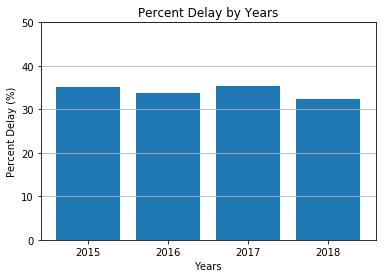

In [68]:
yearly_delay_df = Delay_df.groupby("Year")
yearly_total_df = master_stats_df.groupby("Year")

yearly_delay_per  = []
yearly_list = master_stats_df["Year"].unique()

yearly_delay_per = [yearly_delay_df.get_group(year).size/yearly_total_df.get_group(year).size* 100 for year in yearly_list]


plt.bar(yearly_list,yearly_delay_per)
plt.xlabel("Years")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by Years")
plt.grid(axis='y')
plt.ylim(0,50)
plt.xticks(yearly_list)

plt.show()
plt.tight_layout()


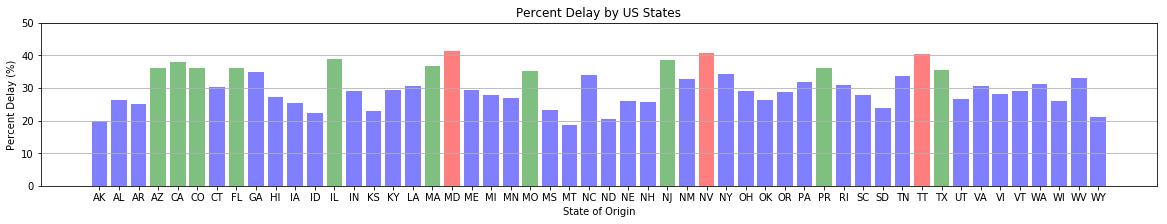

In [54]:
state_delay_df = Delay_df.groupby("OriginState")
state_total_df = master_stats_df.groupby("OriginState")

state_delay_per  = []
state_list = master_stats_df["OriginState"].unique()

state_delay_per = [state_delay_df.get_group(state).size/state_total_df.get_group(state).size* 100 for state in state_list]

colors = ['r' if value >= 40 else 'g' if value >= 35 else 'b'  for value in state_delay_per]

plt.figure(figsize=(20,3))
plt.bar(state_list,state_delay_per,color=colors, alpha=0.5, align="center")
plt.xlabel("State of Origin")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by US States")
plt.grid(axis='y')
plt.ylim(0,50)
plt.show()
plt.tight_layout()



Text(0.5,1,'Delay Reasons')

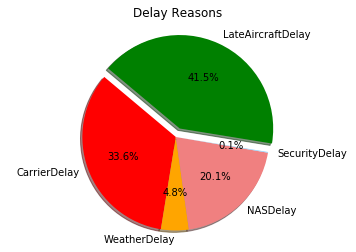

In [19]:
labels = ["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]

count = delay_reasons_df.sum()

explode = (0, 0, 0, 0, 0.1)

colors = ["red", "orange", "lightcoral", "lightskyblue","green"]

plt.pie(count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Delay Reasons")

In [80]:
# dep_timeblk_df = Delay_df.groupby("DepTimeBlk")["DepDelayMinutes"].sum()

# # Create a bar chart based off of the group series from before
# count_chart = dep_timeblk_df.plot(kind='bar', figsize= (15,5))

# # Set the xlabel and ylabel using class methods
# count_chart.set_xlabel("Departure Time")
# count_chart.set_ylabel("Total Delay (Mins)")

# plt.title("Total Delay (Mins) VS Departure Time")
# plt.grid(axis='y')
# plt.show()
# plt.tight_layout()

C:\Users\saife\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


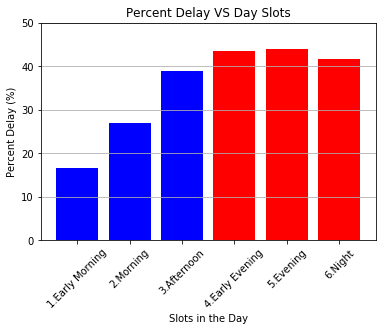

In [74]:
bins = [1, 659, 1159, 1559, 1859, 2059, 2359]

# Create the names for the bins
group_names = ["1.Early Morning","2.Morning","3.Afternoon","4.Early Evening","5.Evening","6.Night"]

time_slot_df = master_stats_df
time_slot_df["Day Slot"] = pd.cut(time_slot_df["CRSDepTime"], bins, labels=group_names)

time_slot_delay_df = Delay_df
time_slot_delay_df["Day Slot"] = pd.cut(time_slot_delay_df["CRSDepTime"], bins, labels=group_names)

time_slot_grouped_df = time_slot_df.groupby("Day Slot")
#time_slot_grouped_df.count()

time_slot_delay_grouped_df = time_slot_delay_df.groupby("Day Slot")
#time_slot_delay_grouped_df.count()

time_slot_per_delay = [time_slot_delay_grouped_df.get_group(slot).size/time_slot_grouped_df.get_group(slot).size * 100 for slot in group_names]


colors = ['r' if value >= 40 else 'b'  for value in time_slot_per_delay]
plt.bar(group_names,time_slot_per_delay, color=colors)
plt.xlabel("Slots in the Day")
plt.ylabel("Percent Delay (%)")
plt.xticks(rotation = 45)
plt.ylim (0,50)

plt.title("Percent Delay VS Day Slots")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

plt.figtext(1.0,0.7, "Note:")
plt.figtext(1.0,0.65, "Circle size correlates with driver count per city.")

plt.show()

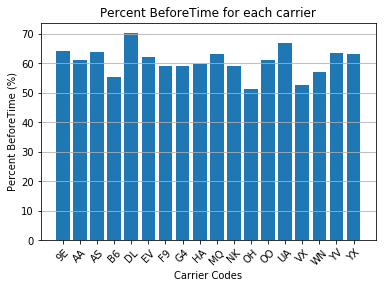

In [22]:
carrier_beforetime_group_df = beforetime_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_beforetime_df = carrier_beforetime_group_df["ArrDelay"].sum()

carrier_bt_per  = []

carrier_bt_per = [carrier_beforetime_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

# print(unique_carrier_list)
# print(carrier_delay_per)

plt.bar(unique_carrier_list,carrier_bt_per)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent BeforeTime (%)")
plt.xticks(rotation = 45)

plt.title("Percent BeforeTime for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()
plt.show()

[1.3471851997363053, 0.6028086910439852, 0.19159868783928935, 3.9211111327150294, 4.188320171455472, 0.564037906590839, 2.1538257292431906, 1.3039797757143097, 1.2465295484163408, 2.5088019869980362, 0.8191680774317969, 0.845188653729153, 3.589005735382591, 4.370001799307712, 2.4938874266862947, 0.9425790307378534, 1.598389369030317, 1.9313438262861728]


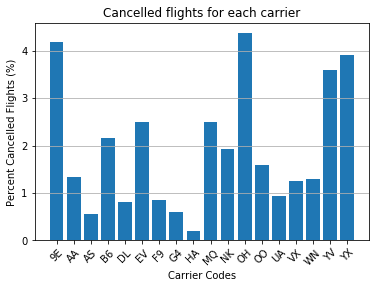

In [76]:
carrier_cancelled_group_df = cancelled_flights_df.groupby("UniqueCarrier")

carrier_cancelled_per = [carrier_cancelled_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]
print(carrier_cancelled_per)

plt.bar(unique_carrier_list,carrier_cancelled_per)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent Cancelled Flights (%)")
plt.xticks(rotation = 45)

plt.title("Cancelled flights for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()
plt.show()


[0.23619832069908883, 0.33783783783783783, 0.11145283148821405, 0.19461042968266237, 0.2329658136480674, 0.24817667889996914, 0.2671886084572519, 0.20272833935663886, 0.2702376088672017, 0.29903896843889394, 0.19649325778919569, 0.1449172720433185, 0.22468733735700694, 0.2525760880516664, 0.25384969973510413, 0.23807135601298712, 0.2812808107511452, 0.15585104963422333]


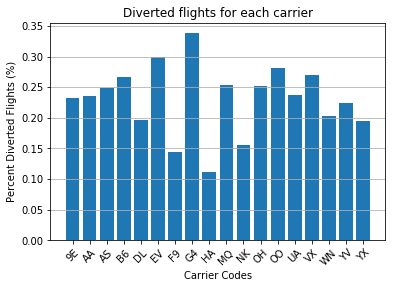

In [77]:
carrier_diverted_group_df = diverted_flights_df.groupby("UniqueCarrier")

carrier_diverted_per = [carrier_diverted_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]
print(carrier_diverted_per)

plt.bar(unique_carrier_list,carrier_diverted_per)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent Diverted Flights (%)")
plt.xticks(rotation = 45)

plt.title("Diverted flights for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()
plt.show()
